# pyUserCalc:  A revised Jupyter notebook calculator for uranium-series disequilibria in basalts

#### Lynne J. Elkins$^{1}$, Marc Spiegelman$^{2}$

$^{1}$ University of Nebraska-Lincoln, Lincoln, NE, USA, lelkins@unl.edu

$^{2}$ Lamont-Doherty Earth Observatory of Columbia University, Palisades, NY, USA

## Key Points

•	Time-dependent forward melting models remain important for interpretation of U-series data in basalts

•	Maintaining availability of public computing tools is a continuing problem in geochemical modeling

•	The cloud-based Jupyter notebook presented here offers a solution that can lead to further models

## Abstract

Meaningful analysis of uranium-series isotopic disequilibria in basaltic lavas relies on the use of complex forward numerical models like dynamic melting (McKenzie, 1985) and equilibrium porous flow (Spiegelman and Elliott, 1993). Historically, such models have either been solved analytically by considering only simplified scenarios such as constant melting rate or constant solid/melt trace element partitioning throughout the melting process, or have relied on incremental or numerical calculators with limited power to solve problems and/or restricted availability. The most public numerical solution to reactive porous flow, UserCalc (Spiegelman, 2000) was maintained on a private institutional server for nearly two decades, but that approach has been unsustainable in light of modern security concerns. Here we present a more long-lasting solution to the problems of availability, model sophistication and flexibility, and long-term access in the form of a cloud-hosted, publicly available Jupyter notebook for calculating time-dependent partial melting with both pure equilibrium and pure disequilibrium melt transport scenarios through a one-dimensional porous flow regime.

## 1. Introduction

The need for time-dependent melting model calculations to interpret the origins of empirically measured U-series isotopic disequilibria in basaltic lavas is well established (e.g., REFS), but the limited and unreliable availability of reproducible tools for making such calculations remains a problem for geochemists. A number of models have been developed for this task, including classical dynamic melting after McKenzie (1985) and the reactive porous flow model of Spiegelman and Elliott (1993). There have since been numerous approaches to using both the dynamic and porous flow models that range from simplified analytical solutions (e.g., Zou, Zou and Zindler, Sims 1999, others) to incremental dynamic melting calculators (Stracke et al., 2003), two-porosity calculators (Lundstrom et al., Jull et al., 2002), and one-dimensional numerical solutions to reactive porous flow (Spiegelman, 2000) and dynamic melting (Bourdon et al., 2005; Elkins et al., 2019). Unfortunately, many of the approaches published since 1990 lacked publicly available tools that would permit others to directly reproduce the authors’ results, and while some of the simplified and incremental approaches remain appropriate for asking and approaching specific questions, they are unsufficient for many current applications that require more complex model use (e.g., two-lithology melting; Elkins et al., 2019). Other tools like UserCalc that were freely available to public users (Spiegelman, 2000) were limited in application and have since become in accessible, due to host server updates in the changing security landscape.

In light of the need for more broadly accessible and flexible solutions to U-series disequilibrium problems in partial melting, here we present a cloud-server hosted, publicly available numerical calculator for one-dimensional, decompression partial melting. The tool is provided in a Jupyter notebook with underlying Python coding and that can be run in a browser software window. Users are able to access the tool using a free cloud server account, which permits them to save a copy of the notebook and modify it for their own model calculation needs. As shown below, the notebook is structured to permit the user to select one of two model versions, including classical reactive porous flow after Spiegelman and Elliott (1993) and Spiegelman (2000), as well as a pure disequilibrium transport model, based on the appendix formulas of Spiegelman and Elliott (1993). The numerical integration approach and key formulas are summarized below, and are available in greater detail in the above references.

## 2. One-dimensional numerical integration of U-series in basalts

The UserCalc model of Spiegelman (2000) formulated a one-dimensional numerical integration for the concentrations of selected U-series isotopes in continuously produced partial melts, after the equilibrium formulas of Spiegelman and Elliott (1993). Our model implementation reproduces and builds on those prior efforts. All of the porous flow models calculate the concentrations and activities of U-series isotopes with appropriate half-lives for the study of partial melting and melt transport processes during adiabatic mantle decompression, namely 238U, 230Th, 226Ra, 235U, and 231Pa. The equilibrium model assumes continuous full chemical equilibrium is achieved between the migrating partial melt and the solid rock matrix along a decompressing one-dimensional column, and relies on conservation of mass for each element with a simplified Darcy’s Law expression to govern melt migration. The concentration expression derived by Spiegelman (2000) for this equilibrium scenario (formula 6 in that reference) is:

..

Spiegelman (2000) further observed that solving for the natural log of the concentrations, rather than the concentrations themselves, is a more “tractable” integration approach for a numerical solver (formulas 7-9 of that article):

..

Finally, Spiegelman (2000) defined a series of additional variables that allow for simpler integration formulas and aid in efficient solution of the model, namely (list with definitions here: rho_bar, F_bar, R_i/i-1, alpha, w_eff, rhoD_bar, etc.).

The reactive porous flow calculation thus relies on both user inputs for F(z) and Di(z), as well as a formula for migrating melt porosity (phi(z) that uses a Darcy’s law expression and scaled permeability factor: (add briefly here).

In addition to reproducing the above effort using more modern and readily accessible computer language (Python instead of FORTRAN) and platform (Jupyter notebooks), here we present an additional calculation tool that solves a similar set of equations for pure chemical disequilibrium  transport during one-dimensional decompression melting. The model solves for the concentration of each nuclide using equations 26-27 of Spiegelman and Elliott (1993):

..

which maintain conservation of mass but act as a more general set of expressions that no longer require full chemical equilibrium to be reached. The modified log concentration expressions for disequilibrium transport are thus:

..


## 3. The pyUserCalc Jupyter notebook

The log concentration equations provided above are differential equations that can be solved using one of the many numerical integration solver tools included in Python software packages. Because the disequilibrium transport model can produce highly variable and very large changes in isotopic concentration in the partial melt over very small increments (i.e., it is a very stiff model), a “stiff” numerical solver such as Radau is highly recommended and is used as the default in our code. Below, the basic tool is provided as a web-enabled notebook that can be implemented by the reader to view the model outcomes and figures; a more complete version is available for online use through the free ENKI cloud portal, as detailed in the supporting information. The notebook determines the log concentration of each nuclide throughout a one-dimensional decompression melting scenario, and then calculates the activity of each nuclide for the same scenario. In addition to variable vs. depth input and output figures, porosity and solid upwelling contour plots, and a data table download tool, which resemble outputs of the previous UserCalc incarnation, this new effort also generates data tables over a range of upwelling rates and porosities of interest, plus activity ratio vs. activity ratio “mesh” plots as editable postscript files.

To use the computing tool, the user selects the embedded code cell by mouse-click and types 'Shift+Enter' to run the cell. The first cell below imports necessary code libraries to access the Python toolboxes and functions that will be used in the rest of the program.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### 3.1. Enter initial input information

The user should next set their initial inputs by editing the code in the cell below. The name for the user input data file should be set in quotes (i.e., replacing the word 'sample' with the appropriate filename, minus the file extension). This name will be used both to find the input file and to label any output files produced. The sample file can be downloaded and viewed to see the proper format for input files. The input file should then be saved to the 'data' folder prior to running the code in the notebook below.

The user can also set a final melting pressure for the model run (PLithos, in kilobars), in order to impose a lithospheric cap that truncates the melt column. This value can be set to 0.0 if no cap is desired. Once the cell looks correct, the user can run the cell as above.

In [2]:
runname='sample'

Plithos = 5.0

### 3.2. Instantiate the solver classes

By running the cells below, the user defines the different program options needed to calculate U-series isotopes in partial melts. All of these cells can be run to define the necessary classes, but only one or two will later be used in a single instance of the program.

#### Option 1: The equilibrium decay chain solver class

This class solves the generic radiocative decay chain problem for the logarithm of the radiogenic component of melt concentration, after Equation 9 in Spiegelman (2000).

$$
    \frac{dU_i^r}{dz} = \lambda'_i\frac{\overline{\rho D_{i}}}{\overline{F D_{i}}}\left[ R_i^{i-1}\exp[U_{i-1}-U_i] - 1\right]
$$

where 
$$
    \lambda'_i = \frac{h\lambda_i}{W_0}
$$ 

are the decay constants scaled by the solid transport time ($h/W_0$) across a layer of depth $h$.

\begin{align}
    \overline{\rho D_{i}} &= \frac{\rho_f}{\rho_s}\phi + (1 -\phi)D_i\\
    \overline{F D_{i}} &= F + (1 -F)D_i
\end{align}

and

$$
    R_i^{i-1} = \alpha_i\frac{D_i^0}{D_{i-1}^0}\frac{\overline{\rho D_{i-1}}}{\overline{\rho D_{i}}}
$$

is the ingrowth factor. $\alpha$ is the initial degree of secular disequilibrium in the *unmelted solid*.

Note:  $U_i = \log(c_f/c_f^0)$ is the total log of the concentration of nuclide $i$ in the melt which can be decomposed into

$$
  U_i = U^s_i + U^r_i
$$

where

$$
    U^s_i = \log\left[ \frac{D_i^0}{\overline{FD}_i}\right]
$$

is the log concentration of a stable nuclide with the same partition coefficients.  U^r_i is the radiogenic ingrowth component.

In [3]:
# This is the equilibrium transport calculator. You probably will not need or want to edit this cell.
# A possible exception: the ODE solver method can be changed if desired, but the default is probably best.

from scipy.integrate import solve_ivp

class EquilTransport:
    '''
    A class for calculating generic radioactive decay chains for the scaled equations 9 in Spiegelman (2000)
    
    Usage:  solver=model(alpha0,lambdas,D,F,dFdz,phi,rho_f=2800.,rho_s=3300.,method='Radau')
    
    Inputs:
        alpha0  :  numpy array of initial activities
        lambdas :  decay constants scaled by solid transport time
        D       :  Function returning an array of partition coefficents at scaled height z'
        F       :  Function that returns the degree of melting F as a function of  z'
        dFdz    :  Function that returns the derivative of F with respect to z'
        phi     :  Function that returns the porosity phi as a function of z'
        R       :  Reactivity factor
        rho_f   :  melt_density
        rho_s   :  solid_density
        method  :  ODE solver method to be passed to ode_solveivp (one of 'RK45', 'Radau', 'BDF')
        
    Outputs:  pandas DataFrame with columns z, Us, Uf
    '''      
    def __init__(self,alpha0,lambdas,D,F,dFdz,phi,Rfact,rho_f=2800., rho_s=3300.,method='Radau'):
        self.alpha0 = alpha0
        self.N = len(alpha0)
        self.D = D
        self.D0 = np.array([D[i](0.) for i in range(self.N)])
        self.lambdas = lambdas
        self.F  = F
        self.dFdz = dFdz
        self.phi = phi
        self.Rfact = Rfact
        self.rho_f = rho_f
        self.rho_s = rho_s
        self.method = method
    
    def F_bar(self,zp):
        '''
        returns  numpy array of size (len(zp),len(D)) for
        
        Fbar_D = F + (1. - F)*D_i
        '''
        D = self.D
        F = self.F(zp)
        if np.isscalar(zp):
            F_bar_D = np.array([ F + (1. - F)*D[i](zp) for i in range(len(D))])
        else :
            F_bar_D = np.zeros((len(zp),len(D)))
            F_bar_D = np.array([ F + (1. - F)*D[i](zp) for i in range(len(D))]).T
        return F_bar_D
    
    def rho_bar(self,zp):
        '''
        returns numpy array of  size (len(zp),len(D)) for
        
        rho_bar_D = rho_f/rho_s*phi + (1. - phi)*D_i
        '''
        rho_s = self.rho_s
        rho_f = self.rho_f
        
        phi = self.phi(zp)
        D = self.D
        if np.isscalar(zp):
            rho_bar_D = np.array([ rho_f/rho_s*phi + (1. - phi)*D[i](zp) for i in range(len(D))])
        else: 
            rho_bar_D = np.zeros((len(zp),len(D)))
            rho_bar_D = np.array([ rho_f/rho_s*phi + (1. - phi)*D[i](zp) for i in range(len(D))]).T
           
        return rho_bar_D
    
    def rhs(self,z,Ur):
        '''
        Returns right hand side of generic decay chain problem for the log of the radiogenic concentration.
        
        The full equation for dU/dz is given by Eq (9) in Spiegelman 2000, but here we split
        
        Uf = U^st + U^r where
        U^st is the log of the stable element concentrations U^s = log(D(0)/Fbar_z)
        U^r is the radiogenic ingrowth part
        
        Solid concentration is ignored as unnecessary in this version, but would be simply the fluid
        concentration times the partition coefficient for that depth.
        
        The general equation is 
            dU_i^r/dz = h\lambda_i/Weff_i * [ R_i^{i-1} exp(Uf_{i-1} - Uf_i) - 1.)
            
        This routine assumes that lambda, D, D0, lambda_tmp, phi0, W_0 and alpha_0 are set by the UserCalc driver routine.
        '''
            
        # determine F_bar(z) and rho_bar(z) once
        Fb = self.F_bar(z)
        rb = self.rho_bar(z)
        
        # initial value of partition coefficients
        D0 = self.D0
        
        # initial value densities
        rho_f = self.rho_f
        rho_s = self.rho_s
        
        # stable concentration
        Ust = np.log(D0/Fb)
        
        # total melt concentration
        Uf = Ust + Ur

        # effective velocity and scaled rate term
        lambda_prime = self.lambdas*rb/Fb
        
        # ingrowth factor and exponential factor
        R = np.zeros(len(lambda_prime))
        expU = np.zeros(len(lambda_prime))
        for i in range(1,len(lambda_prime)):
            R[i] = self.alpha0[i]*D0[i]/D0[i-1]*rb[i-1]/rb[i]
            expU[i] = np.exp(Uf[i-1]-Uf[i])
            
        # return full RHS
        
        return lambda_prime*(R*expU - 1.)
        
    def solve(self,z_eval=None):
        '''
        solves generic radioactive decay chain problem as an ODE initial value problem
        if z_eval = None, save every point
        else save output at every z_eval depth
        '''
        
        # Set initial condition and solve ODE      
        Ur_0 = np.zeros(len(self.D0))
        sol = solve_ivp(self.rhs,(0.,1.),Ur_0,t_eval=z_eval,method=self.method)
        z = sol.t
        Ur = sol.y
        # calculate stable component of fluid concentration
        Ust = np.log(self.D0/self.F_bar(z)).T 
        # calculate total fluid concentration
        Uf = Ur + Ust
        # placeholder for solid concentration (not used here, but cannot be blank)
        Us = Uf
        return z,Us,Uf
        
        

#### Option 2: The disequilibrium decay chain solver class

This class solves the disequilibrium transport problem described in Spiegelman and Elliott, 1993, i.e., Eqs. (26) and (27) rewritten in terms of the logs of the concentrations:

$$
    U^s_i = \log\left(\frac{c_i^{s}}{c_{i,0}^s}\right),  \quad U^f_i = \log\left(\frac{c_i^{f}}{c_{i,0}^f}\right) 
$$
thus
$$
    \frac{dU_i}{dz} = \frac{1}{c_i} \frac{dc_i}{dz}
$$

... (expand this to add methods and equations for scaled reactivity, any additional equations needed for clarity) ...

In [4]:
# This is the disequilibrium transport calculator. You probably will not need or want to edit this cell.
# A possible exception: the ODE solver method can be changed if desired, but the default is probably best.

from scipy.integrate import solve_ivp

class DisequilTransport:
    '''
    A class for calculating generic radioactive decay chains for the scaled equations 9 in Spiegelman (2000)
    
    Usage:  solver=model(alpha0,lambdas,D,F,dFdz,phi,rho_f=2800., rho_s=3300.,method='Radau')
    
    inputs:
        alpha0  :  numpy array of initial activities
        lambdas :  decay constants scaled by solid transport time
        D       :  Function returning an array of partition coefficents at scaled height z'
        F       :  Function that returns the degree of melting F as a function of  z'
        dFdz    :  Function that returns the derivative of F with respect to z'
        phi     :  Function that returns the porosity phi as a function of z'
        Rfact   :  Reactivity factor
        rho_f   :  melt_density
        rho_s   :  solid_density
        method  :  ODE solver method to be passed to ode_solveivp (one of 'RK45', 'Radau', 'BDF')
        
    Outputs:  pandas DataFrame with columns z, Us, Uf
    '''
    def __init__(self,alpha0,lambdas,D,W0,F,dFdz,phi,Rfact,rho_f=2800.,rho_s=3300.,method='Radau'):
        self.alpha0 = alpha0
        self.N = len(alpha0)
        self.D = lambda zp: np.array([D[i](zp) for i in range(self.N) ])
        self.D0 = self.D(0.)
        self.W0 = W0
        self.lambdas = lambdas
        self.F  = F
        self.dFdz = dFdz
        self.phi = phi
        self.Rfact = Rfact
        self.rho_f = rho_f
        self.rho_s = rho_s
        self.method = method
        
    def rhs(self,z,U):
        '''
        Returns right hand side of generic chain problem for the log of concentration of the solid
        U^s = U[:N]  where N=length of the decay chain
        and
        U^f = U[N:]
        
        The full equation for dU/dz is given by Eqs 28 and 29 in Spiegelman and Elliott (1993), but
        in terms of concentrations c^s and c^f. Here log concentrations are calculated as in Spiegelman (2000).
            
        This routine assumes that lambda, D, D0, lambda_tmp, phi0, W_0 and alpha_0 are set by the UserCalc driver routine.
        '''
        
        # calculate F(z) and D(z)
        F = self.F(z)
        dFdz = self.dFdz(z)
        D = np.array(self.D(z))
        phi = self.phi(z)
        
        # initial value of partition coefficients
        D0 = self.D0
        
        # split U into solid and melt components for convenience
        N = self.N
        Us = U[:N]
        Uf = U[N:]
        
# stable melting component of dU
        dUs = (1. - 1./D)/(1.-F)*dFdz + Rfact*(np.exp(Uf-Us)-1./D)/(self.rho_s*self.W0*(1.-F))
        # careful here about the initial gradient (and floating point test)
        if F == 0.:
            dUf = dUs/2.
        else:
            dUf = (D0/D*np.exp(Us-Uf)-1.)/F - Rfact*(1.-D*np.exp(Us-Uf))/(self.rho_f*self.W0*F)
            
        # ingrowth terms
        Rs = np.zeros(N)
        Rf = np.zeros( N)
        a0 = self.alpha0
        for i in range(1,N):
            Rs[i] = a0[i-1]/a0[i]*np.exp(Us[i-1]-Us[i])
            Rf[i] = (D0[i]*a0[i-1])/(D0[i-1]*a0[i])*np.exp(Uf[i-1]- Uf[i])
            
        # add to stable terms
        dUs += (1 - phi)/(1. - F)*self.lambdas*(Rs - 1.)
        if F == 0.:
            dUf +=  self.lambdas*(Rf - 1.)
        else:
            dUf += (self.rho_f*phi)/(self.rho_s*F)*self.lambdas*(Rf - 1.)
            
        # return full RHS
        dU=np.zeros(2*N)
        dU[:N] = dUs
        dU[N:] = dUf
        
        return dU
        
    def solve(self,z_eval=None):
        '''
        solves generic radioactive decay chain problem as an ODE initial value problem
        if z_eval = None,  save every point
        else save output at every z_eval depth
        '''
        
        # Set initial condition and solve ODE  
        N = self.N
        U0 = np.zeros(2*N)
        try:
            sol = solve_ivp(self.rhs,(0.,1.),U0,t_eval=z_eval,method=self.method)
            z = sol.t
            U = sol.y
        except ValueError as err:
            print('Warning:  solver did not complete, returning NaN: {}'.format(err))
            z = np.array([1.])
            U = np.NaN*np.ones((2*N,len(z)))
        # return solid and liquid concentrations
        Us = U[:N,:]
        Uf = U[N:,:]
        return z,Us,Uf
        

### 3.3. View input data
The cells below will read in the input data using the user filename specified above. Note that the cell can first be edited to select one of two file read options: the first assumes there is no comment header row, while the second expects one row of header labels. Currently, the second option is selected by default.

In [5]:
input_file = 'input_files/{}.csv'.format(runname)

#df = pd.read_csv(input_file,dtype=float)
df = pd.read_csv(input_file,skiprows=1,dtype=float)
df

,P,F,Kr,DU,DTh,DRa,DPa
0,40.0,0.00000,1.0,0.00900,0.00500,0.00002,0.00001
1,39.0,0.00241,1.0,0.00900,0.00500,0.00002,0.00001
2,38.0,0.00482,1.0,0.00900,0.00500,0.00002,0.00001
3,37.0,0.00723,1.0,0.00900,0.00500,0.00002,0.00001
4,36.0,0.00964,1.0,0.00900,0.00500,0.00002,0.00001
5,35.0,0.01210,1.0,0.00900,0.00500,0.00002,0.00001
6,34.0,0.01450,1.0,0.00900,0.00500,0.00002,0.00001
7,33.0,0.01690,1.0,0.00900,0.00500,0.00002,0.00001
8,32.0,0.01930,1.0,0.00900,0.00500,0.00002,0.00001
9,31.0,0.02170,1.0,0.00900,0.00500,0.00002,0.00001


#### 3.3.1. Modify the input file for different lithospheric scenarios

The cell below imposes a lithospheric melting cap at the final melting pressure, PLithos. There are two options for how this final melting pressure is imposed; the user can select which is active to impose their preferred condition on the input data set. The first option (currently inactive by default) simply deletes all lines in the input table for depths shallower than PLithos. This is a quick, simple option for a 1D column scenario, where melting simply stops at the base of the lithosphere.

The second option changes the degree of melting increments (dF) to a value of 0 for all depths shallower than 'PLithos'. This is preferable if the user aims to track additional radioactive decay after melting has ceased and during transport through the lithosphere. Note that if the PLithos value is not explicitly listed as a pressure in the data input file, the script below finds the nearest pressure to PLithos to identify the maximum degree of melting (Fmax) reached at the base of the lithosphere.

In [6]:
# Option 1:
# df = df[df.P > Plithos]

# Option 2:
Pfinal = df.iloc[(df['P']-Plithos).abs().idxmin()]
F_max = Pfinal[1].tolist()
df.loc[(df['P'] < Plithos),['F']] = F_max

#### 3.3.2. Modifications for melt segregation in the lithosphere

If option 2 (tracking melt transport through the lithosphere after melting has stopped) was selected above, the cell below offers additional choices for overwriting melt-rock interaction in the lithosphere after melt segregation occurs. As above, the user can choose to comment or uncomment the preferred option (or skip this cell altogher to leave the partition coefficients as they are in the initial input file). We note that if dF = 0 (i.e., there is no melting occurring), melt-rock reaction would only occur during equilibrium or scaled reactivity porous flow scenarios; no reaction would occur in the pure chemical disequilibrium scenario.

The first choice below imposes new, constant melt-rock partition coefficients during lithospheric transport. These values are assumed to be fixed and are defined by the user. The second choice defines the partition coefficients after melting has stopped using the partition coefficient values at the depth where melting stops (i.e., PLithos in one-dimensional scenarios).

In [7]:
# Option 1 (new melt-rock partition coefficients):
D_U_lith = 0.005
D_Th_lith = 0.004
D_Ra_lith = 0.00002
D_Pa_lith = 0.00001

# Option 2 (melt-rock partition coefficients defined based on final melting pressure):
#D_U_lith = Pfinal[3].tolist()
#D_Th_lith = Pfinal[4].tolist()
#D_Ra_lith = Pfinal[5].tolist()
#D_Pa_lith = Pfinal[6].tolist()

# Implement the changes above (do not change these lines):
df.loc[(df['P'] < Plithos),['DU']] = D_U_lith
df.loc[(df['P'] < Plithos),['DTh']] = D_Th_lith
df.loc[(df['P'] < Plithos),['DRa']] = D_Ra_lith
df.loc[(df['P'] < Plithos),['DPa']] = D_Pa_lith

#### 3.3.3. View modified input variables and data table

The cells below will process the input data and show them as a set of figures and a table so the user can check they are correct prior to any calculations.

Figure 1. Pressure in kilobars vs. degree of melting (F), permeability scaling factor (Kr), and partition coefficient values (D values) for the modified input conditions for planned model runs.

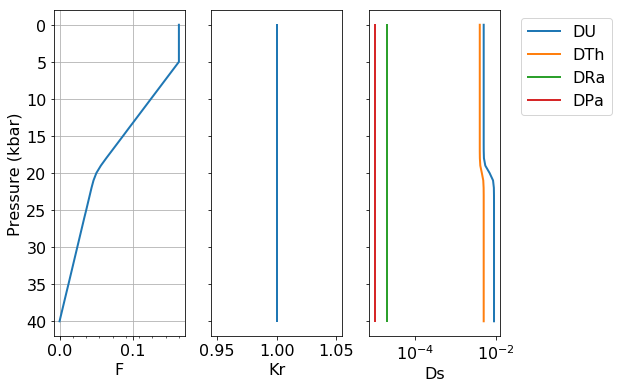

In [8]:
from UserCalc import plot_inputs
plot_inputs(df)

Table 1. Amended input table showing and confirming any input modifications made above.

In [9]:
df

,P,F,Kr,DU,DTh,DRa,DPa
0,40.0,0.00000,1.0,0.00900,0.00500,0.00002,0.00001
1,39.0,0.00241,1.0,0.00900,0.00500,0.00002,0.00001
2,38.0,0.00482,1.0,0.00900,0.00500,0.00002,0.00001
3,37.0,0.00723,1.0,0.00900,0.00500,0.00002,0.00001
4,36.0,0.00964,1.0,0.00900,0.00500,0.00002,0.00001
5,35.0,0.01210,1.0,0.00900,0.00500,0.00002,0.00001
6,34.0,0.01450,1.0,0.00900,0.00500,0.00002,0.00001
7,33.0,0.01690,1.0,0.00900,0.00500,0.00002,0.00001
8,32.0,0.01930,1.0,0.00900,0.00500,0.00002,0.00001
9,31.0,0.02170,1.0,0.00900,0.00500,0.00002,0.00001


### 3.4. Solving the 1-D column problem

The cell below will initialize the solver object and establish the initial conditions needed to complete a single, one-dimensional model calculation run. Three options for models are presented: the 'EquilTransport' model calculates reactive porous flow with full chemical equilibrium throughout, after Spiegelman and Elliot (1993). The 'DisequilTransport' model determines isotopic activities during melting for a pure chemical disequilibrium transport scenario. The user should select the appropriate model for the calculation they are performing.

Before running the cell, the user should also select desired parameters for the initial model run. Note that if nothing is entered or any of the lines are deleted, the model default assumes initial porosity (phi0) = 0.008, initial solid upwelling rate (W0) = 3 cm/yr., a permeability exponent (n) of 2, and fluid and solid densities (rho_f and rho_s, respectively) of 2800 and 3300. Note that upwelling rates should always be entered in units of cm/yr.

Finally, in cases where initial conditions other than secular equilibrium are desired, the default isotopic activities ('alpha0' values for each nuclide, with default of 1.0) can be overwritten with the user's preferred values.

When the cell is run, a full one-dimensional calculation will be completed and the outcomes can be viewed below.

In [14]:
from UserCalc import UserCalc
#us = UserCalc(EquilTransport,df)
us = UserCalc(DisequilTransport,df)

phi0 = 0.008
W0 = 3.
n = 2.
rho_f = 2800.
rho_s = 3300.

Rfact = 0.05

alpha0_238U = 1.
alpha0_235U = 1.
alpha0_230Th = 1.
alpha0_226Ra = 1.
alpha0_231Pa = 1.

# Run the model for the conditions above.
alpha0_all = ([alpha0_238U,alpha0_235U,alpha0_226Ra,alpha0_235U,alpha0_231Pa])
df_out = us.solve_all_1D(phi0,n,W0,alpha0_all)

/Users/lelkins2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:74: RuntimeWarning: overflow encountered in true_divide
/Users/lelkins2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:74: RuntimeWarning: overflow encountered in subtract


ValueError: Length of values does not match length of index

The cell below will display the activity ratios determined for the final melt composition at the end of the simulation (i.e., the top of the melting column).

In [ ]:
df_out[['(230Th/238U)','(226Ra/230Th)','(231Pa/235U)']].iloc[-1]

The following cells will display the output results for the one-dimensional model run as a data table (Table 2) and set of figures with pressure (Figure 2).

Table 2. View the output table of initial one-dimensional model run results.

In [ ]:
df_out

Figure 2. Pressure in kilobars vs. a) porosity and degree of melting, and b) isotopic activity ratios for the initial model run above.

In [ ]:
from UserCalc import plot_1Dcolumn
plot_1Dcolumn(df_out)
plt.show()

Finally, the cell below will export the model results to a downloadable .csv file in the user's folder.

In [ ]:
df_out.to_csv("output_files/{}_1D_solution.csv".format(runname))

### 3.5. Calculated gridded activity ratios for a range of scenarios

The three cells below will determine a series of one-dimensional column results for the same user input file defined and modified above, but over a range of values for maximum residual porosity (phi0) and solid mantle upwelling rate (W0); these results will then be saved as downloadable output files. The user can select whether to define the specific 'phi0' and 'W0' values as evenly spaced log grid intervals (option 1) or with manually specified values (option 2). As above, all upwelling rates should be entered in units of cm/yr.

In [ ]:
# Option 1:
# phi0 = np.logspace(-3,-2,11)
# W0 = np.logspace(-1,1,11)

# Option 2:
phi0 = np.array([0.001, 0.002, 0.005, 0.01])
W0 = np.array([0.5, 1., 2., 5., 10., 20., 50.])

import time
tic = time.clock()
toc = time.clock()
print('\nelapsed time={}'.format(toc-tic))

# Calculate the U-238 decay chain grid values:
# NOTE: Alphas other than 1 are not working in this version for the grids.
# I need to fix how it is being called as a vector above, just haven't gotten to it yet!
# So don't run this cell or those below for now. The unmodified version in the older notebooks works better.
act = us.solve_grid(phi0, n, W0, us.D_238, us.lambdas_238, us.alpha0_238)
Th = act[0]
Ra = act[1]
df = pd.DataFrame(Th)
df.to_csv("output_files/{}_Th_grid.csv".format(runname))
df = pd.DataFrame(Ra)
df.to_csv("output_files/{}_Ra_grid.csv".format(runname))

In [ ]:
# Calculate the U-235 decay chain grid values:
act_235 = us.solve_grid(phi0, n, W0, us.D_235, us.lambdas_235, us.alpha0_235)
Pa = act_235[0]
df = pd.DataFrame(Pa)
df.to_csv("output_files/{}_Pa_grid.csv".format(runname))

The cells below will produce figures that illustrate the model results in a variety of ways. First, each isotopic activity ratio is contoured in parameter-parameter space (Figure 3), and then upwelling rates (W) and maximum residual melt porosities (phi) are contoured as mesh grids in activity ratio-activity ratio space (Figure 4). All figures are automatically saved to the user's folder.

Figure 3. Diagrams of upwelling rate (W) vs. maximum residual melt porosity (phi) showing contoured activity ratios.

In [ ]:
from UserCalc import plot_contours
plot_contours(phi0,W0,act, figsize=(12,12))
plt.savefig("output_files/{}_Th_Ra_contours.ps".format(runname))

In [ ]:
plot_contours(phi0,W0,act_235)
plt.savefig("output_files/{}_Pa_contours.ps".format(runname))

Figure 4. Diagrams showing a) (226Ra/230Th) vs. (230Th/238U) and b) (231Pa/235U) vs. (230Th/238U) for the gridded upwelling rate (W) and maximum residual porosity (phi) values defined above.

In [ ]:
from UserCalc import plot_mesh_Ra
plot_mesh_Ra(Th,Ra,W0,phi0)
plt.savefig("output_files/{}_Ra-Th.ps".format(runname))

In [ ]:
from UserCalc import plot_mesh_Pa
plot_mesh_Pa(Th,Pa,W0,phi0)
plt.savefig("output_files/{}_Pa-Th.ps".format(runname))

## Summary
Put some text here

## Acknowledgments
Put some text here too

## References

Work on BibTex formatting above

McKenzie 1985
Spiegelman 2000
Spiegelman and Elliott 1993
Zou
Zou and Zindler
Sims 1999
Stracke et al., 2003
Lundstrom et al.
Jull et al., 2002
Bourdon et al., 2005
Elkins et al., 2019
McKenzie and Bickle (1985)
Asimow et al. (2001)